# Etude de la performance d'un réseau de chaleur

On étudie le fonctionnement d'un petit réseau de chaleur qui fournit le chauffage à des bâtiments construits dans les années 1960-1970. Son fonctionnement sera simulé à l'aide des modèles vus auparavant. 

<div>
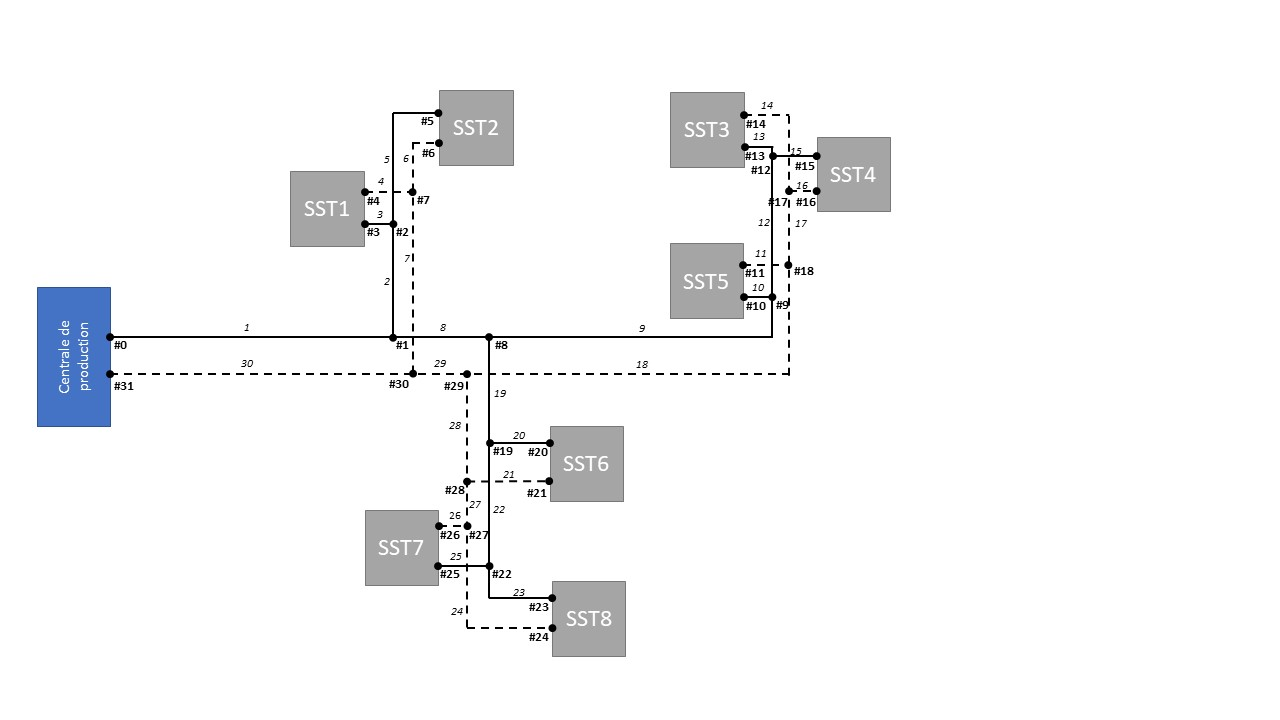
</div>
<center> Schéma du réseau de chaleur étudié </center>

Après avoir pris en main l'outil de simulation du réseau, l’objectif sera d’évaluer l’effet sur le réseau de différentes actions de rénovation sur les bâtiments raccordés et d’une extension. Il vous sera également demandé de proposer des pistes d’amélioration du réseau en exploitant les paramètres laissés à votre main.

On étudiera donc les 4 cas d’études suivants :
- Cas d’étude 1 : la rénovation partielle (isolation seulement) d'une partie des bâtiments reliés au réseau
- Cas d’étude 2 : la rénovation en profondeur (isolation et émetteurs de chauffage) d'une partie des bâtiments reliés au réseau
- Cas d’étude 3 : la rénovation en profondeur de la totalité des bâtiments reliés au réseau
- Cas d’étude 4 : l’extension du réseau à 2 nouveaux bâtiments BBC

La comparaison des différents cas d’étude peut se faire selon plusieurs critères :
- Les grandeurs caractéristiques du fonctionnement du réseau (températures, débit du réseau primaire)
- Des indicateurs énergétiques : consommation de gaz, taux d’énergie renouvelable dans le mix énergétique de production
- Des indicateurs de performance : le nombre d’heures  d’inconfort dans les logements

# Etude du réseau de référence

_**Prise en main de l'outil de simulation**_

## Paramètres de simulation

Le programme de simulation doit être alimenté par 3 fichiers :
- un fichier de séries temporelles donnant la température de l'air extérieur et des puissances de chauffage appelées par les bâtiments (ou sous-stations, 1 bâtiment = 1 sous-station) raccordés au réseau
- un fichier donnant les caractéristiques des sous-stations
- un fichier décrivant les canalisations qui composent le réseau

Sur les fichiers décrivant les caractéristiques des sous-stations et des canalisations, il est nécessaire de renseigner les noeuds auxquels sont connectés les différents éléments du réseau.

Il est également nécessaire de fournir les paramètres suivants :
- la température de l'eau en sortie du doublet géothermal 
- la température du sol
- les deux coefficients de la loi d'eau au départ du circuit primaire
- la température minimale demandée par le réseau.

Enfin, il faut renseigner le nom du fichier (en format .xlsx) dans lequel seront enregistrés toutes les grandeurs d'intérêt de la simulation.


In [1]:
"Fichiers d'entrées"
Fichier_entrees = 'Entrees_Albi_10min_30j.xlsx'  #Température extérieure et demande de chauffage des bâtiments
Donnees_SST = 'DonneesSST_Albi24.xlsx'           #Caractéristiques des sous-stations
Fichier_Tubes = 'DonneesReseau_Albi24.xlsx'      #Caractéristiques des canalisations 

"Paramètres principaux"
T_geo_base = 65                          #Température de l'eau en sortie du doublet géothermal
T_sol = 10                               #Température du sol
A_chauffe = -1.85                        #coefficient A de la loi d'eau du circuit primaire
B_chauffe = 77                           #coefficient B de la loi d'eau du circuit primaire
Tprimaire_min = 60                       #Température minimale au départ du circuit primaire

Fichier_resultats = 'Results.xlsx'

## Simulation

<ins>**Ne pas modifier la cellule ci-dessous**</ins>

In [2]:
import numpy as np
import pandas as pd
import os
import sys

dossier = os.getcwd()
sys.path.append(dossier+'\\Modèles')
import DHC_Components
import SimulationReseau

import matplotlib.pyplot as plt
import ipywidgets as widgets
%matplotlib widget

parametres = (T_geo_base,T_sol,A_chauffe, B_chauffe, Tprimaire_min)

(P_geo, P_gaz, T_cons_prod, T_res_ret, Sorties_SST, Input, temps_simu) = SimulationReseau.Run(dossier, Fichier_entrees, Donnees_SST, Fichier_Tubes, parametres, Fichier_resultats)


Le taux d'inconfort dans les SST est respectivement de  46.0 , 18.3 , 6.7 , 4.3 , 50.3 , 66.0 , 8.3 , 10.0 heures
Le taux d'énergies renouvelables est de  55.3  %


## Figures

Le vecteur ``Sorties_SST[i]`` est composé des grandeurs suivantes relatives à la sous-station ``i`` :
- température de l'eau en entrée côté primaire, `Tp_in_SST`
- température de l'eau en sortie côté primaire, `Tp_out_SST`
- débit de l'eau côté primaire, ``Mp_SST``
- température de consigne au secondaire, ``Tcons_SST``
- température de l'eau en sortie côté secondaire ``Ts_out_SST``
- puissance fournie par la sous-station, ``P_out_SST``
- l'ouverture de la vanne de régulation côté primaire, ``Y_ouv_SST``
- l'indicateur d'inconfort (potentiel), ``inconfort``


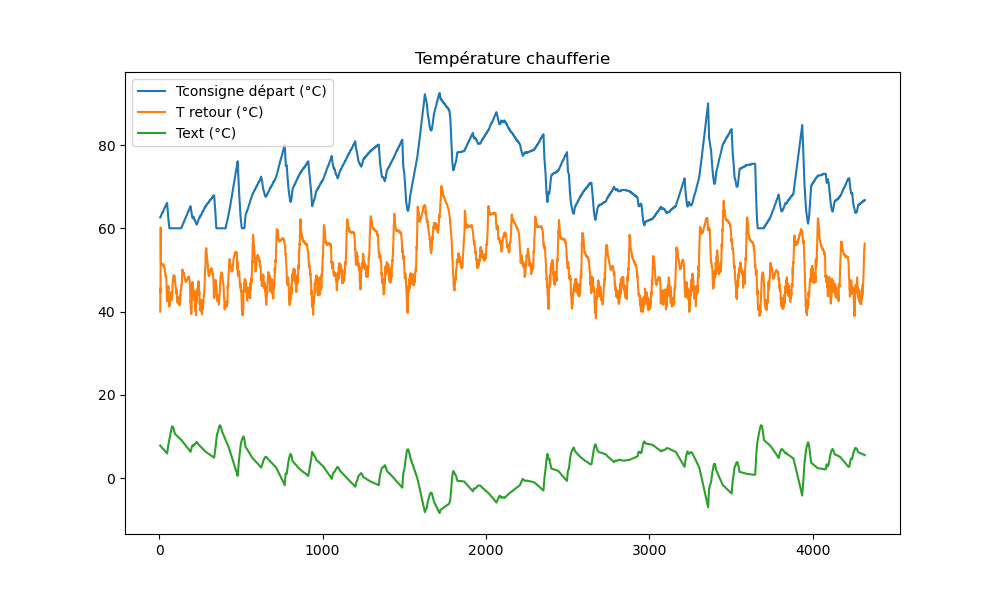

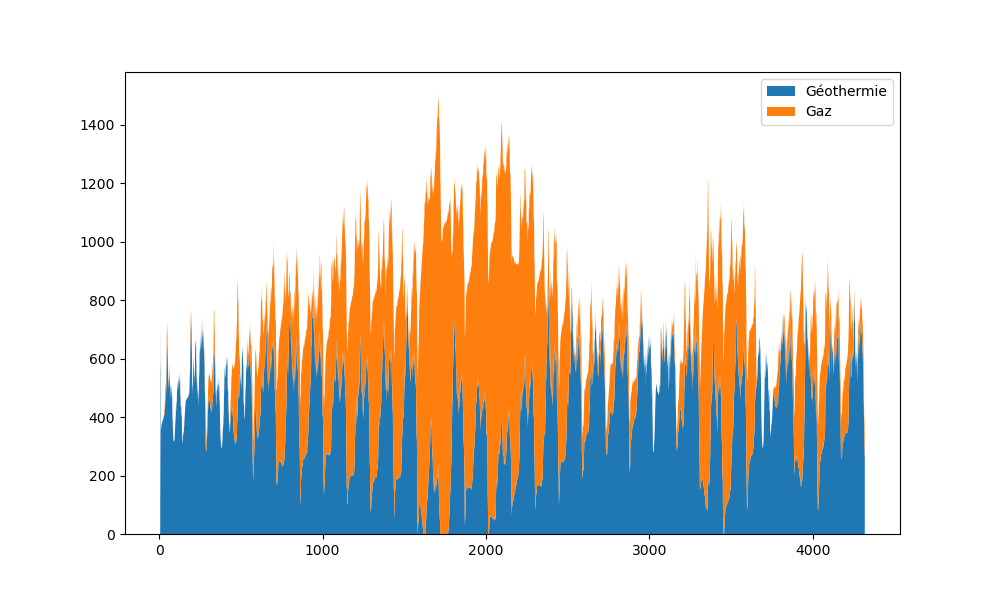

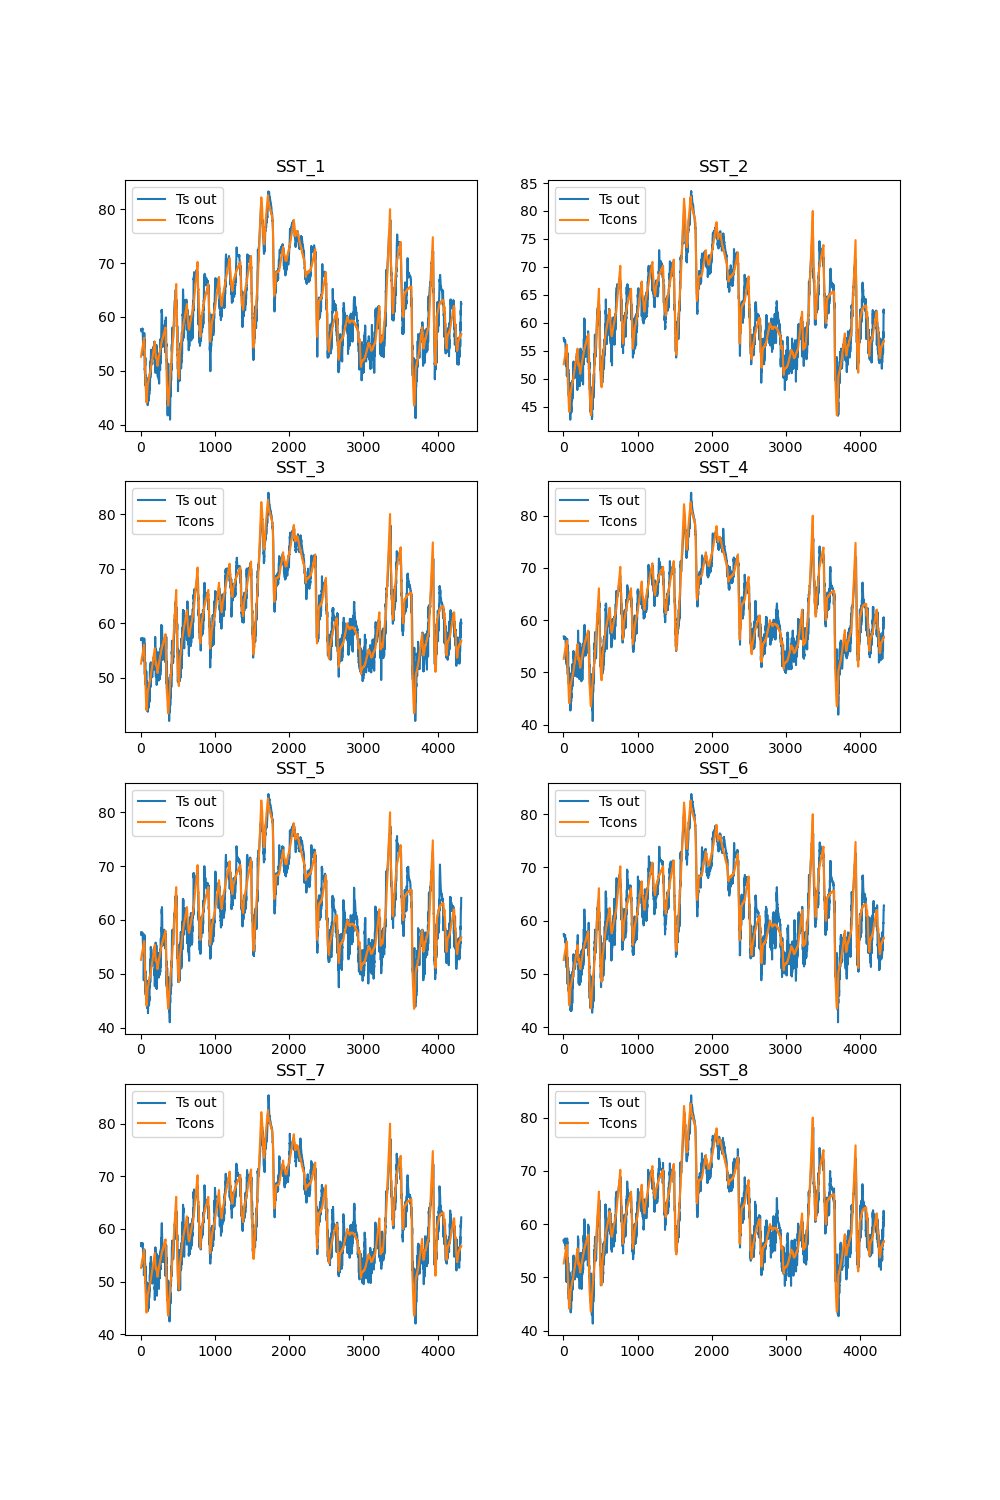

In [3]:
ax_t = np.arange(6,temps_simu,1)

fig1, ax0 = plt.subplots(figsize=(10,6))
ax0.plot(ax_t,T_cons_prod[6:], label = "Tconsigne départ (°C)")
ax0.plot(ax_t,T_res_ret[6:], label = "T retour (°C)")
ax0.plot(ax_t,Input[6:,1], label ="Text (°C)")
ax0.set_title('Température chaufferie')
ax0.legend()
plt.show()

production = {
    'Géothermie': P_geo[7:],
    'Gaz': P_gaz[7:],
}

fig2,ax = plt.subplots(figsize=(10,6))
ax.stackplot(ax_t,production.values(), labels=production.keys())
ax.legend()

debitprimaire = np.sum(Sorties_SST[2],axis=1)

fig3, axes = plt.subplots(nrows=4, ncols=2, figsize=(10,15))
for i, ax in enumerate(axes.flat):
    ax.plot(ax_t,Sorties_SST[4][6:,i], label = "Ts out")
    ax.plot(ax_t,Sorties_SST[3][6:,i], label = "Tcons")
    ax.set_title('SST_%d' %(i+1))
    ax.legend()

# Etude de l'impact de plans de rénovation des bâtiments sur la performance du réseau


## Etude de cas n°1

La municipalité décide de rénover partiellement une partie des bâtiments raccordés au réseau. Leur consommation d’énergie est réduite de 30% mais les émetteurs ne sont pas modifiés. Les composants (sous-stations, canalisations du réseau primaire et centrale de production) du réseau de chaleur ne sont pas modifiés.

<ins>*Travail demandé</ins> :*  
a.	Calculer les indicateurs énergétiques et de performance du cas d’étude et les comparer à ceux du cas de référence.  
b.	Quels ont été les effets de la rénovation partielle des bâtiments sur le réseau ? Comment expliquer ces évolutions ?  
c.	Quelle(s) amélioration(s) suggéreriez-vous à l’exploitant du réseau ? Justifier

### Fichiers et données d'entrée

In [4]:
"Fichiers d'entrées"
Fichier_entrees = 'Entrees_Albi_10min_30j_cas1.xlsx'  #Température extérieure et demande de chauffage des bâtiments
Donnees_SST = 'DonneesSST_Albi24_cas1.xlsx'           #Caractéristiques des sous-stations
Fichier_Tubes = 'DonneesReseau_Albi24.xlsx'      #Caractéristiques des canalisations 

"Paramètres principaux"
T_geo_base = 65                          #Température de l'eau en sortie du doublet géothermal
T_sol = 10                               #Température du sol
A_chauffe = -1.85                        #coefficient A de la loi d'eau du circuit primaire
B_chauffe = 77                           #coefficient B de la loi d'eau du circuit primaire
Tprimaire_min = 60                       #Température minimale au départ du circuit primaire

Fichier_resultats = 'Results_cas1.xlsx'

### Simulation

**Ne pas modifier**

In [5]:
import numpy as np
import pandas as pd
import os
import sys

dossier = os.getcwd()
sys.path.append(dossier+'\\Modèles')
import DHC_Components
import SimulationReseau

import matplotlib.pyplot as plt
import ipywidgets as widgets
%matplotlib widget

parametres = (T_geo_base,T_sol,A_chauffe, B_chauffe, Tprimaire_min)

(P_geo1, P_gaz1, T_cons_prod1, T_res_ret1, Sorties_SST1, Input1, temps_simu) = SimulationReseau.Run(dossier, Fichier_entrees, Donnees_SST, Fichier_Tubes, parametres, Fichier_resultats)


Le taux d'inconfort dans les SST est respectivement de  0.0 , 0.0 , 0.0 , 0.0 , 0.0 , 61.3 , 6.8 , 8.5 heures
Le taux d'énergies renouvelables est de  52.7  %



### Figures

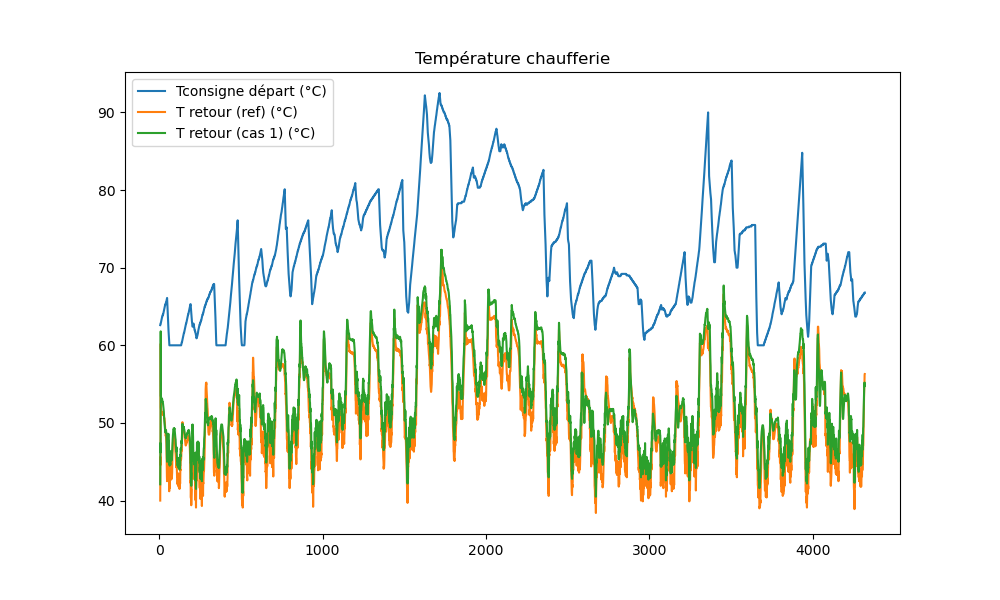

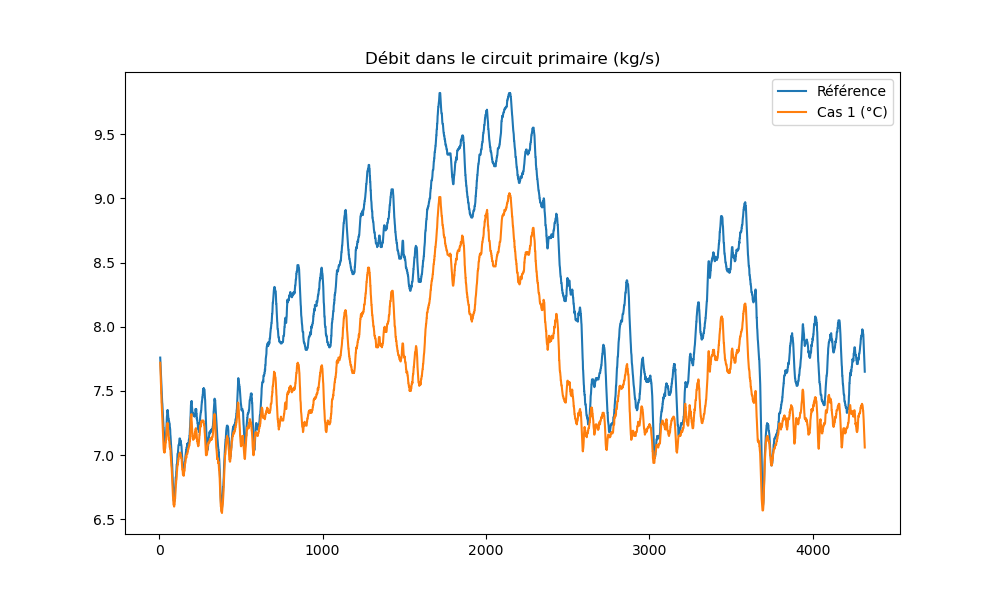

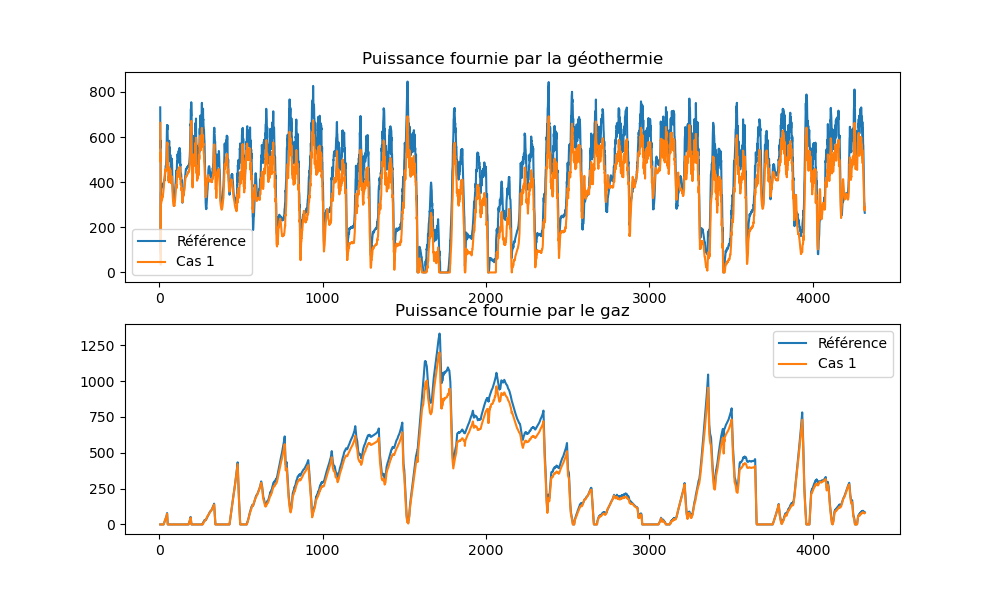

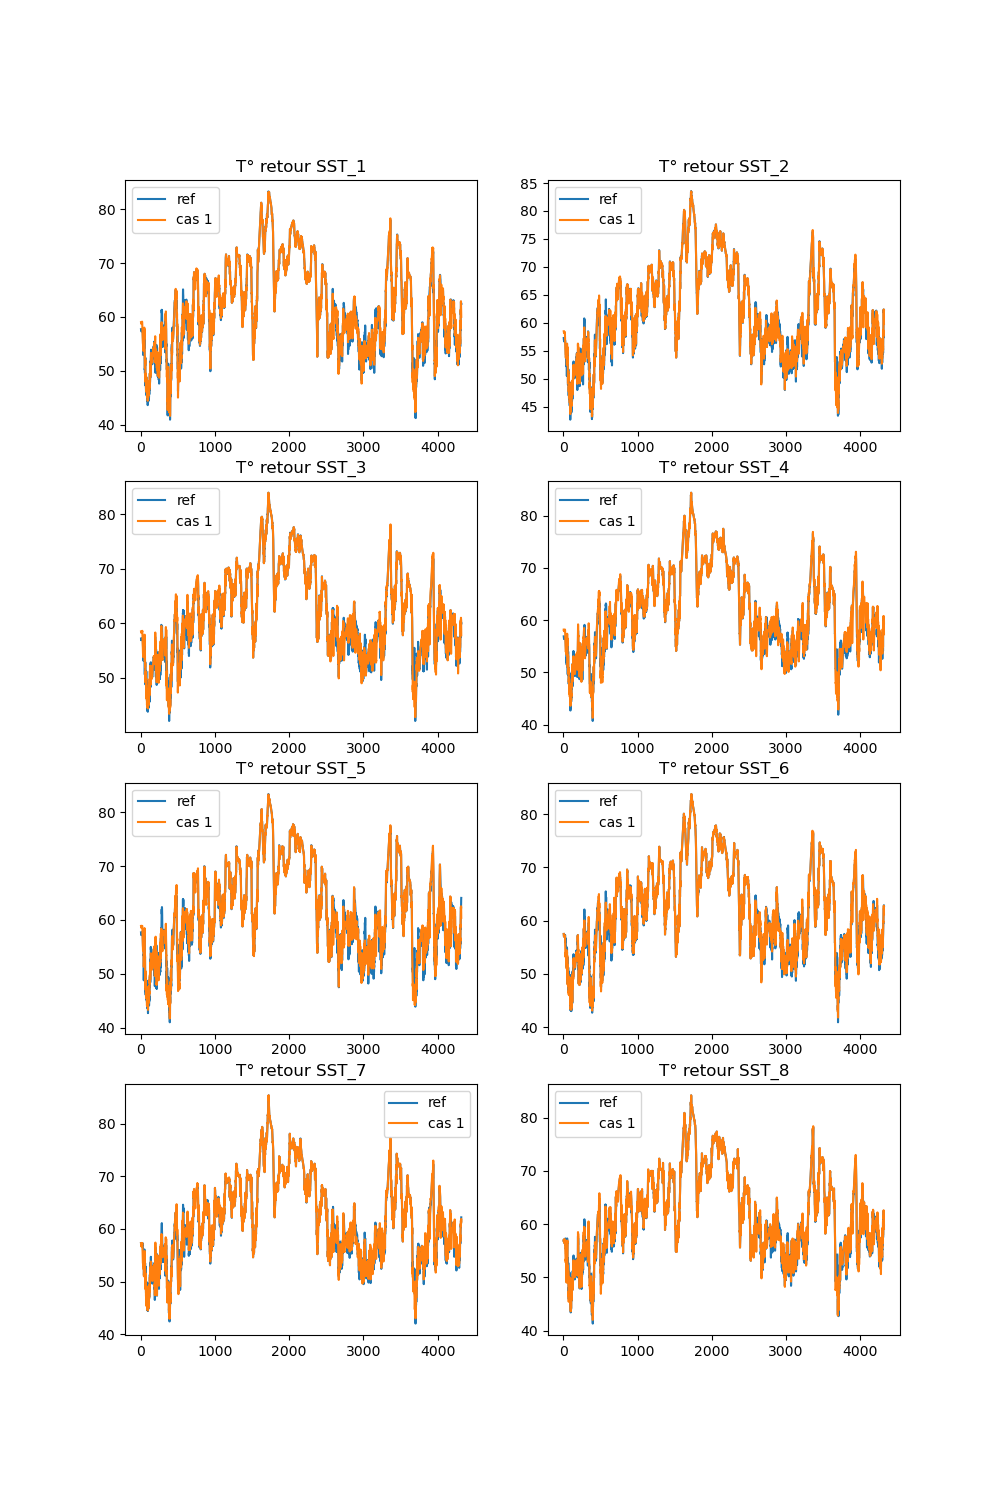

In [6]:
ax_t = np.arange(6,temps_simu,1)

fig1, ax0 = plt.subplots(figsize=(10,6))
ax0.plot(ax_t,T_cons_prod1[6:], label = "Tconsigne départ (°C)")
ax0.plot(ax_t,T_res_ret[6:], label = "T retour (ref) (°C)")
ax0.plot(ax_t,T_res_ret1[6:], label = "T retour (cas 1) (°C)")
ax0.set_title('Température chaufferie')
ax0.legend()
plt.show()

fig2, ax0 = plt.subplots(figsize=(10,6))
debitprimaire1 = np.sum(Sorties_SST1[2],axis=1)
ax0.plot(ax_t,debitprimaire[6:], label = "Référence")
ax0.plot(ax_t,debitprimaire1[6:], label = "Cas 1 (°C)")
ax0.set_title('Débit dans le circuit primaire (kg/s)')
ax0.legend()
plt.show()

fig3,axes = plt.subplots(nrows=2, ncols=1, figsize=(10,6))
ax0, ax1 = axes.flatten()
ax0.plot(ax_t,P_geo[7:], label = "Référence")
ax0.plot(ax_t,P_geo1[7:], label = "Cas 1")
ax0.set_title('Puissance fournie par la géothermie')
ax0.legend()

ax1.plot(ax_t,P_gaz[7:], label = "Référence")
ax1.plot(ax_t,P_gaz1[7:], label = "Cas 1")
ax1.set_title('Puissance fournie par le gaz')
ax1.legend()

fig4, axes = plt.subplots(nrows=4, ncols=2, figsize=(10,15))
for i, ax in enumerate(axes.flat):
    ax.plot(ax_t,Sorties_SST[4][6:,i], label = "ref")
    ax.plot(ax_t,Sorties_SST1[4][6:,i], label = "cas 1")
    ax.set_title('T° retour SST_%d' %(i+1))
    ax.legend()

## Etude de cas n°3

### Fichiers et données d'entrées

In [14]:
"Fichiers d'entrées"
Fichier_entrees = 'Entrees_Albi_10min_30j_cas2.xlsx'  #Température extérieure et demande de chauffage des bâtiments
Donnees_SST = 'DonneesSST_Albi24_cas2.xlsx'           #Caractéristiques des sous-stations
Fichier_Tubes = 'DonneesReseau_Albi24.xlsx'      #Caractéristiques des canalisations 

"Paramètres principaux"
T_geo_base = 65                          #Température de l'eau en sortie du doublet géothermal
T_sol = 10                               #Température du sol
A_chauffe = -1.85                        #coefficient A de la loi d'eau du circuit primaire
B_chauffe = 77                           #coefficient B de la loi d'eau du circuit primaire
Tprimaire_min = 60                       #Température minimale au départ du circuit primaire

Fichier_resultats = 'Results_cas2.xlsx'

### Simulation

In [7]:
import numpy as np
import pandas as pd
import os
import sys

dossier = os.getcwd()
sys.path.append(dossier+'\\Modèles')
import DHC_Components
import SimulationReseau

import matplotlib.pyplot as plt
import ipywidgets as widgets
%matplotlib widget

parametres = (T_geo_base,T_sol,A_chauffe, B_chauffe, Tprimaire_min)

(P_geo2, P_gaz2, T_cons_prod2, T_res_ret2, Sorties_SST2, Input, temps_simu) = SimulationReseau.Run(dossier, Fichier_entrees, Donnees_SST, Fichier_Tubes, parametres, Fichier_resultats)


Le taux d'inconfort dans les SST est respectivement de  0.0 , 0.0 , 0.0 , 0.0 , 0.0 , 61.3 , 6.8 , 8.5 heures
Le taux d'énergies renouvelables est de  52.7  %


### Figures

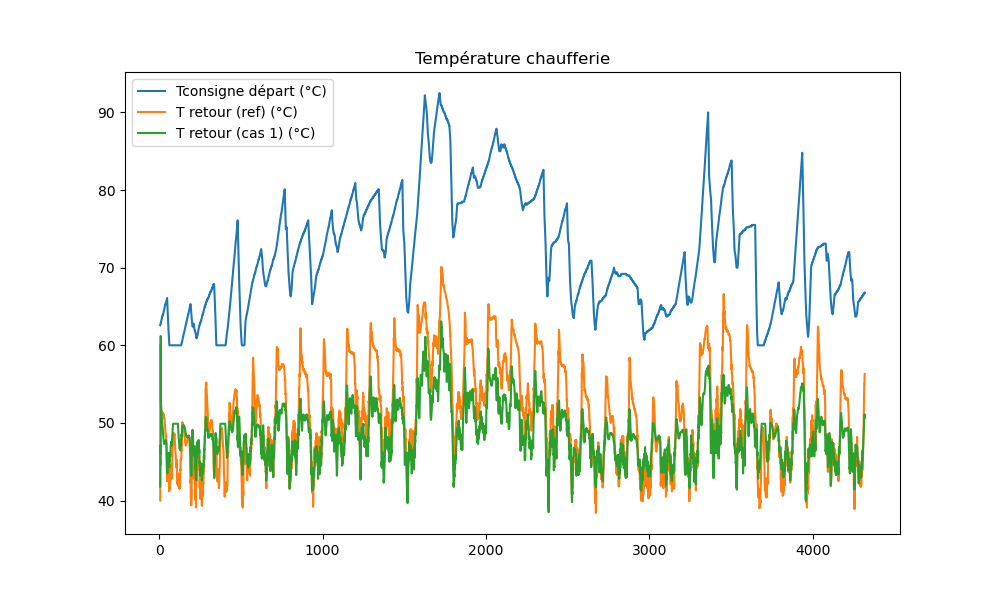

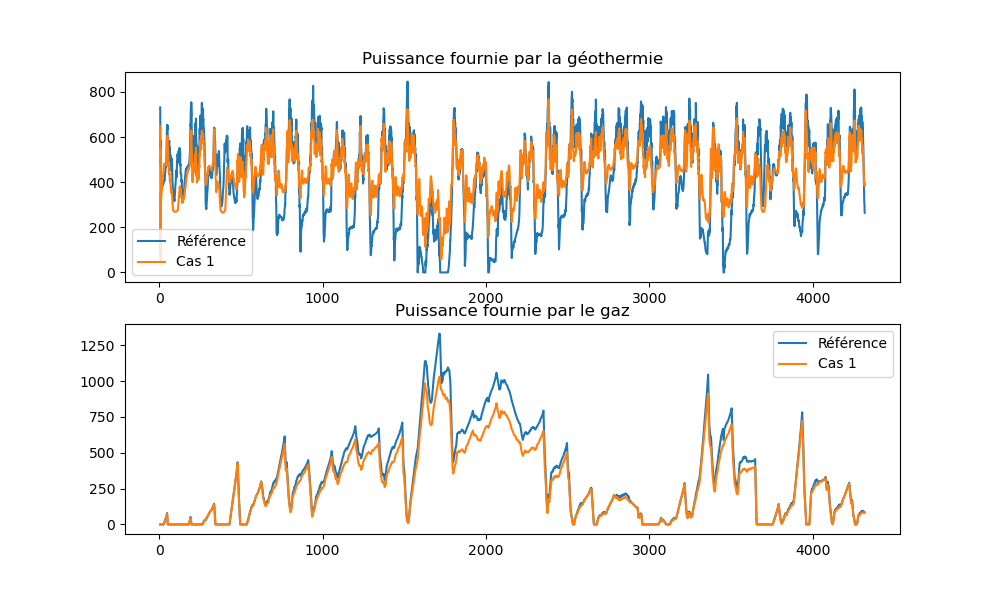

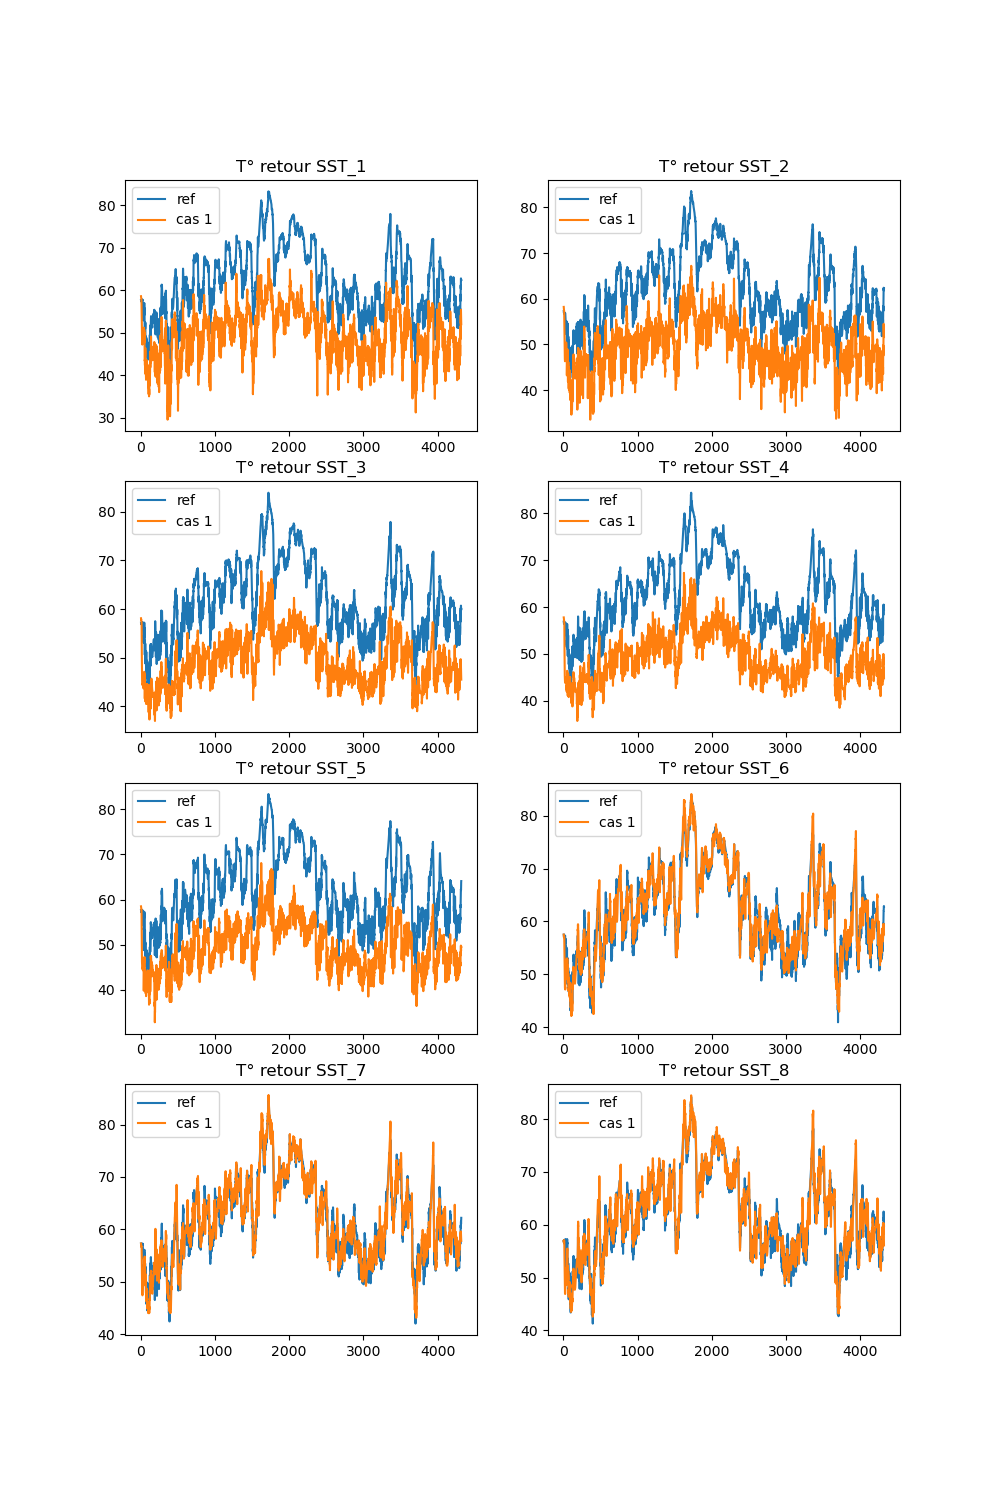

In [17]:
plt.close()
ax_t = np.arange(6,temps_simu,1)

fig1, ax0 = plt.subplots(figsize=(10,6))
ax0.plot(ax_t,T_cons_prod2[6:], label = "Tconsigne départ (°C)")
ax0.plot(ax_t,T_res_ret[6:], label = "T retour (ref) (°C)")
ax0.plot(ax_t,T_res_ret2[6:], label = "T retour (cas 2) (°C)")
ax0.set_title('Température chaufferie')
ax0.legend()
plt.show()

fig2, ax0 = plt.subplots(figsize=(10,6))
debitprimaire2 = np.sum(Sorties_SST1[2],axis=1)
ax0.plot(ax_t,debitprimaire[6:], label = "Référence")
ax0.plot(ax_t,debitprimaire2[6:], label = "Cas 2 (°C)")
ax0.set_title('Débit dans le circuit primaire (kg/s)')
ax0.legend()
plt.show()

fig2,axes = plt.subplots(nrows=2, ncols=1, figsize=(10,6))
ax0, ax1 = axes.flatten()
ax0.plot(ax_t,P_geo[7:], label = "Référence")
ax0.plot(ax_t,P_geo2[7:], label = "Cas 2")
ax0.set_title('Puissance fournie par la géothermie')
ax0.legend()

ax1.plot(ax_t,P_gaz[7:], label = "Référence")
ax1.plot(ax_t,P_gaz2[7:], label = "Cas 2")
ax1.set_title('Puissance fournie par le gaz')
ax1.legend()

fig3, axes = plt.subplots(nrows=4, ncols=2, figsize=(10,15))
for i, ax in enumerate(axes.flat):
    ax.plot(ax_t,Sorties_SST[4][6:,i], label = "ref")
    ax.plot(ax_t,Sorties_SST2[4][6:,i], label = "cas 2")
    ax.set_title('T° retour SST_%d' %(i+1))
    ax.legend()

## Etude de cas n°3

### Fichiers et données d'entrées

In [14]:
"Fichiers d'entrées"
Fichier_entrees = 'Entrees_Albi_10min_30j_cas3.xlsx'  #Température extérieure et demande de chauffage des bâtiments
Donnees_SST = 'DonneesSST_Albi24_cas3.xlsx'           #Caractéristiques des sous-stations
Fichier_Tubes = 'DonneesReseau_Albi24.xlsx'      #Caractéristiques des canalisations 

"Paramètres principaux"
T_geo_base = 65                          #Température de l'eau en sortie du doublet géothermal
T_sol = 10                               #Température du sol
A_chauffe = -1.85                        #coefficient A de la loi d'eau du circuit primaire
B_chauffe = 77                           #coefficient B de la loi d'eau du circuit primaire
Tprimaire_min = 60                       #Température minimale au départ du circuit primaire

Fichier_resultats = 'Results_cas3.xlsx'

### Simulation

**Ne pas modifier**

In [ ]:
import numpy as np
import pandas as pd
import os
import sys

dossier = os.getcwd()
sys.path.append(dossier+'\\Modèles')
import DHC_Components
import SimulationReseau

import matplotlib.pyplot as plt
import ipywidgets as widgets
%matplotlib widget

parametres = (T_geo_base,T_sol,A_chauffe, B_chauffe, Tprimaire_min)

(P_geo3, P_gaz3, T_cons_prod3, T_res_ret3, Sorties_SST3, Input, temps_simu) = SimulationReseau.Run(dossier, Fichier_entrees, Donnees_SST, Fichier_Tubes, parametres, Fichier_resultats)


### Figures

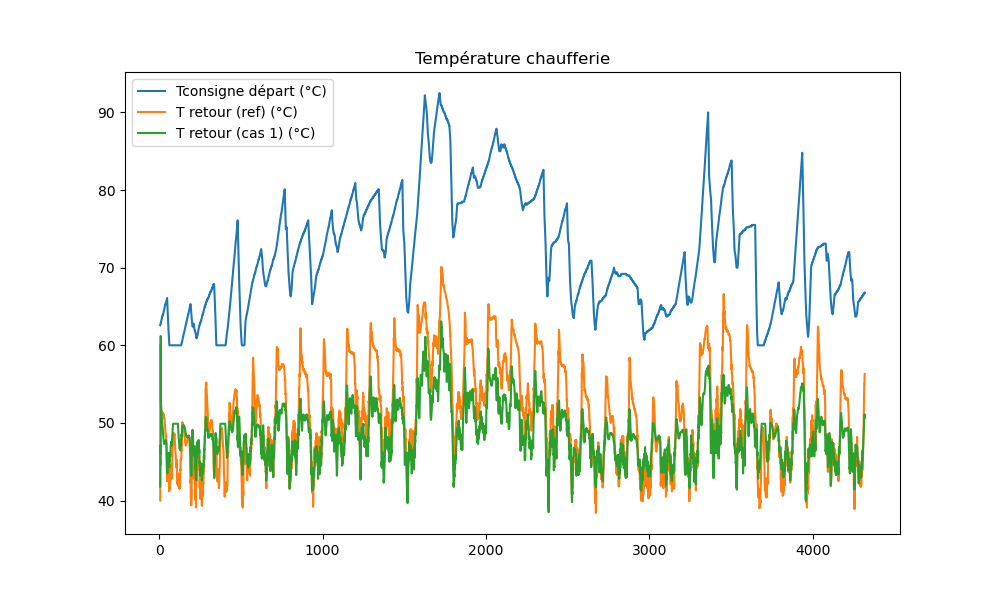

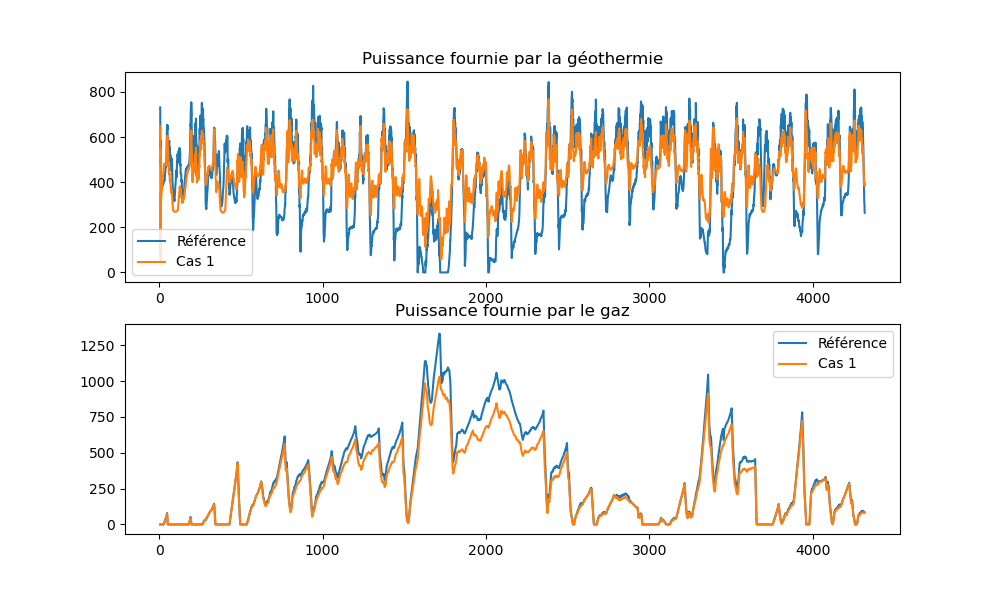

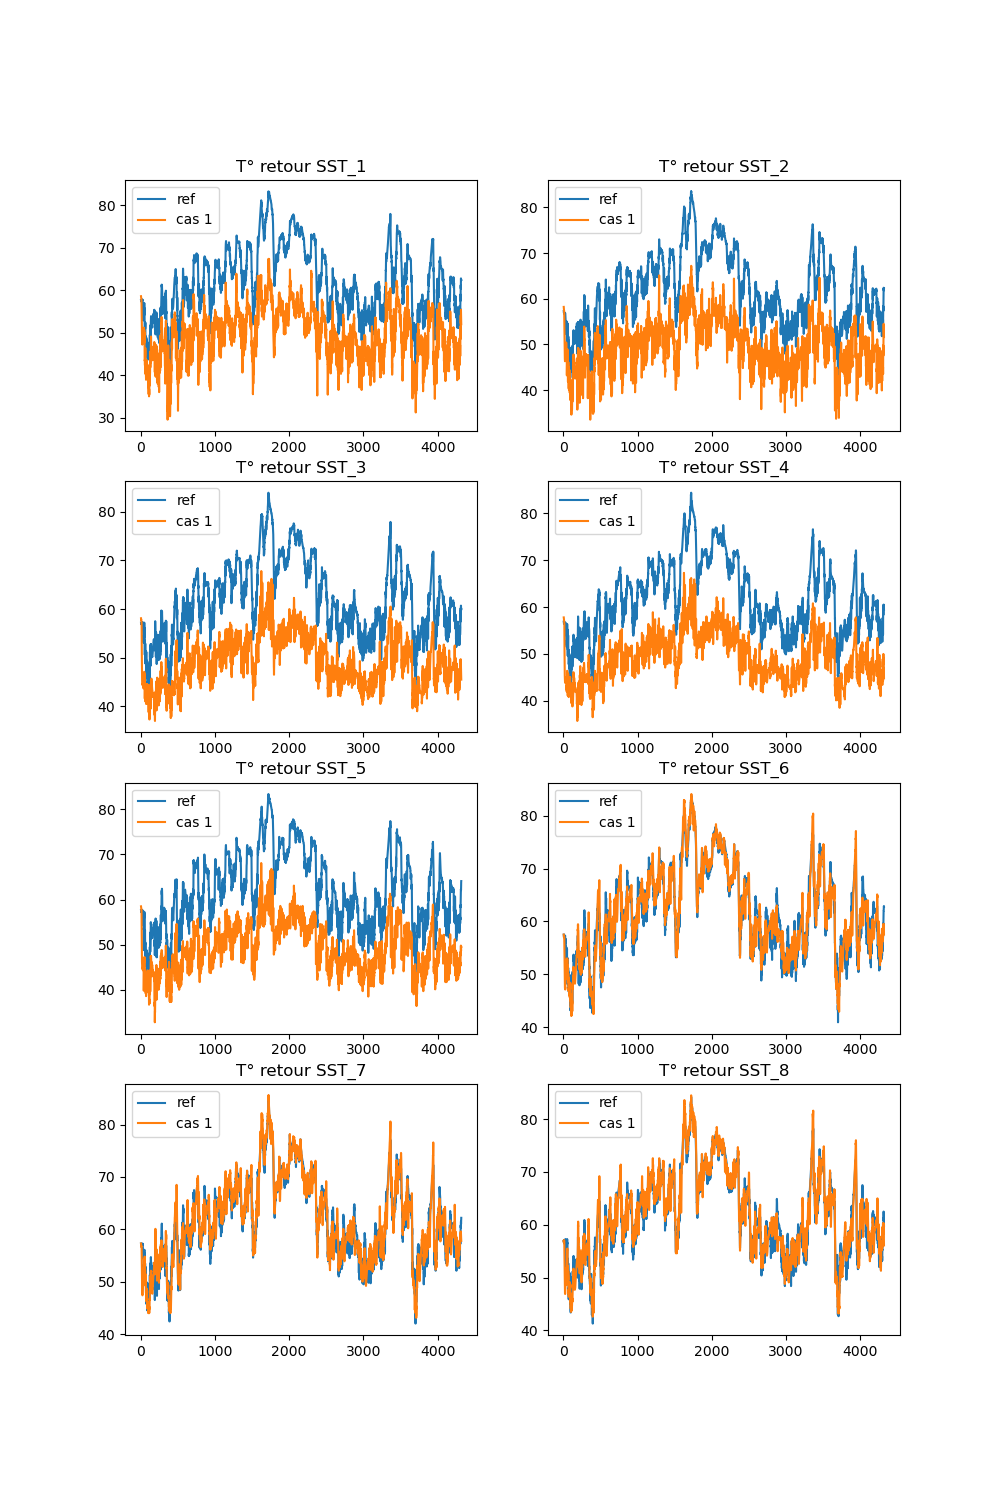

In [17]:
plt.close()
ax_t = np.arange(6,temps_simu,1)

fig1, ax0 = plt.subplots(figsize=(10,6))
ax0.plot(ax_t,T_cons_prod3[6:], label = "Tconsigne départ (°C)")
ax0.plot(ax_t,T_res_ret[6:], label = "T retour (ref) (°C)")
ax0.plot(ax_t,T_res_ret3[6:], label = "T retour (cas 3) (°C)")
ax0.set_title('Température chaufferie')
ax0.legend()
plt.show()

fig2, ax0 = plt.subplots(figsize=(10,6))
debitprimaire2 = np.sum(Sorties_SST1[2],axis=1)
ax0.plot(ax_t,debitprimaire[6:], label = "Référence")
ax0.plot(ax_t,debitprimaire3[6:], label = "Cas 3 (°C)")
ax0.set_title('Débit dans le circuit primaire (kg/s)')
ax0.legend()
plt.show()

fig2,axes = plt.subplots(nrows=2, ncols=1, figsize=(10,6))
ax0, ax1 = axes.flatten()
ax0.plot(ax_t,P_geo[7:], label = "Référence")
ax0.plot(ax_t,P_geo3[7:], label = "Cas 3")
ax0.set_title('Puissance fournie par la géothermie')
ax0.legend()

ax1.plot(ax_t,P_gaz[7:], label = "Référence")
ax1.plot(ax_t,P_gaz3[7:], label = "Cas 3")
ax1.set_title('Puissance fournie par le gaz')
ax1.legend()

fig3, axes = plt.subplots(nrows=4, ncols=2, figsize=(10,15))
for i, ax in enumerate(axes.flat):
    ax.plot(ax_t,Sorties_SST[4][6:,i], label = "ref")
    ax.plot(ax_t,Sorties_SST3[4][6:,i], label = "cas 3")
    ax.set_title('T° retour SST_%d' %(i+1))
    ax.legend()

## Etudes de cas n°4

### Fichiers et données d'entrées

In [14]:
"Fichiers d'entrées"
Fichier_entrees = 'Entrees_Albi_10min_30j_cas3.xlsx'  #Température extérieure et demande de chauffage des bâtiments
Donnees_SST = 'DonneesSST_Albi24_cas3.xlsx'           #Caractéristiques des sous-stations
Fichier_Tubes = 'DonneesReseau_Albi24.xlsx'      #Caractéristiques des canalisations 

"Paramètres principaux"
T_geo_base = 65                          #Température de l'eau en sortie du doublet géothermal
T_sol = 10                               #Température du sol
A_chauffe = -1.85                        #coefficient A de la loi d'eau du circuit primaire
B_chauffe = 77                           #coefficient B de la loi d'eau du circuit primaire
Tprimaire_min = 60                       #Température minimale au départ du circuit primaire

Fichier_resultats = 'Results_cas3.xlsx'

### Simulation

In [ ]:
import numpy as np
import pandas as pd
import os
import sys

dossier = os.getcwd()
sys.path.append(dossier+'\\Modèles')
import DHC_Components
import SimulationReseau

import matplotlib.pyplot as plt
import ipywidgets as widgets
%matplotlib widget

parametres = (T_geo_base,T_sol,A_chauffe, B_chauffe, Tprimaire_min)

(P_geo4, P_gaz4, T_cons_prod4, T_res_ret4, Sorties_SST4, Input, temps_simu) = SimulationReseau.Run(dossier, Fichier_entrees, Donnees_SST, Fichier_Tubes, parametres, Fichier_resultats)


### Figures

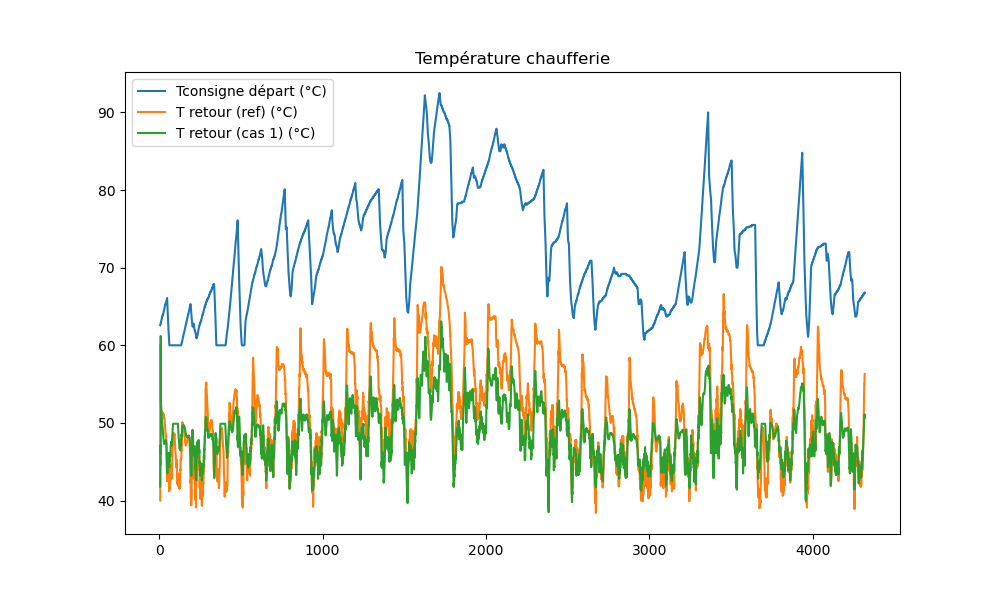

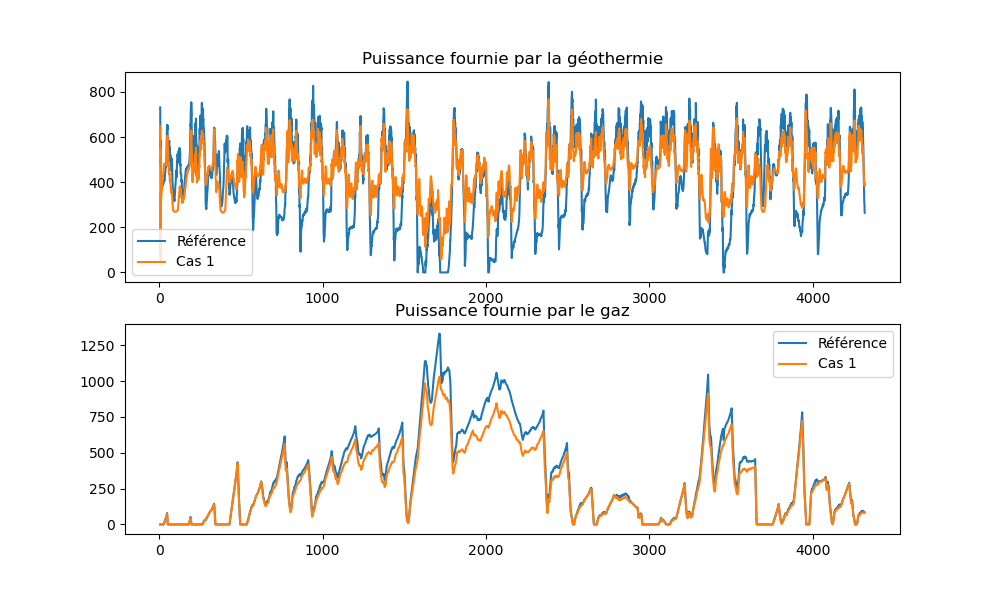

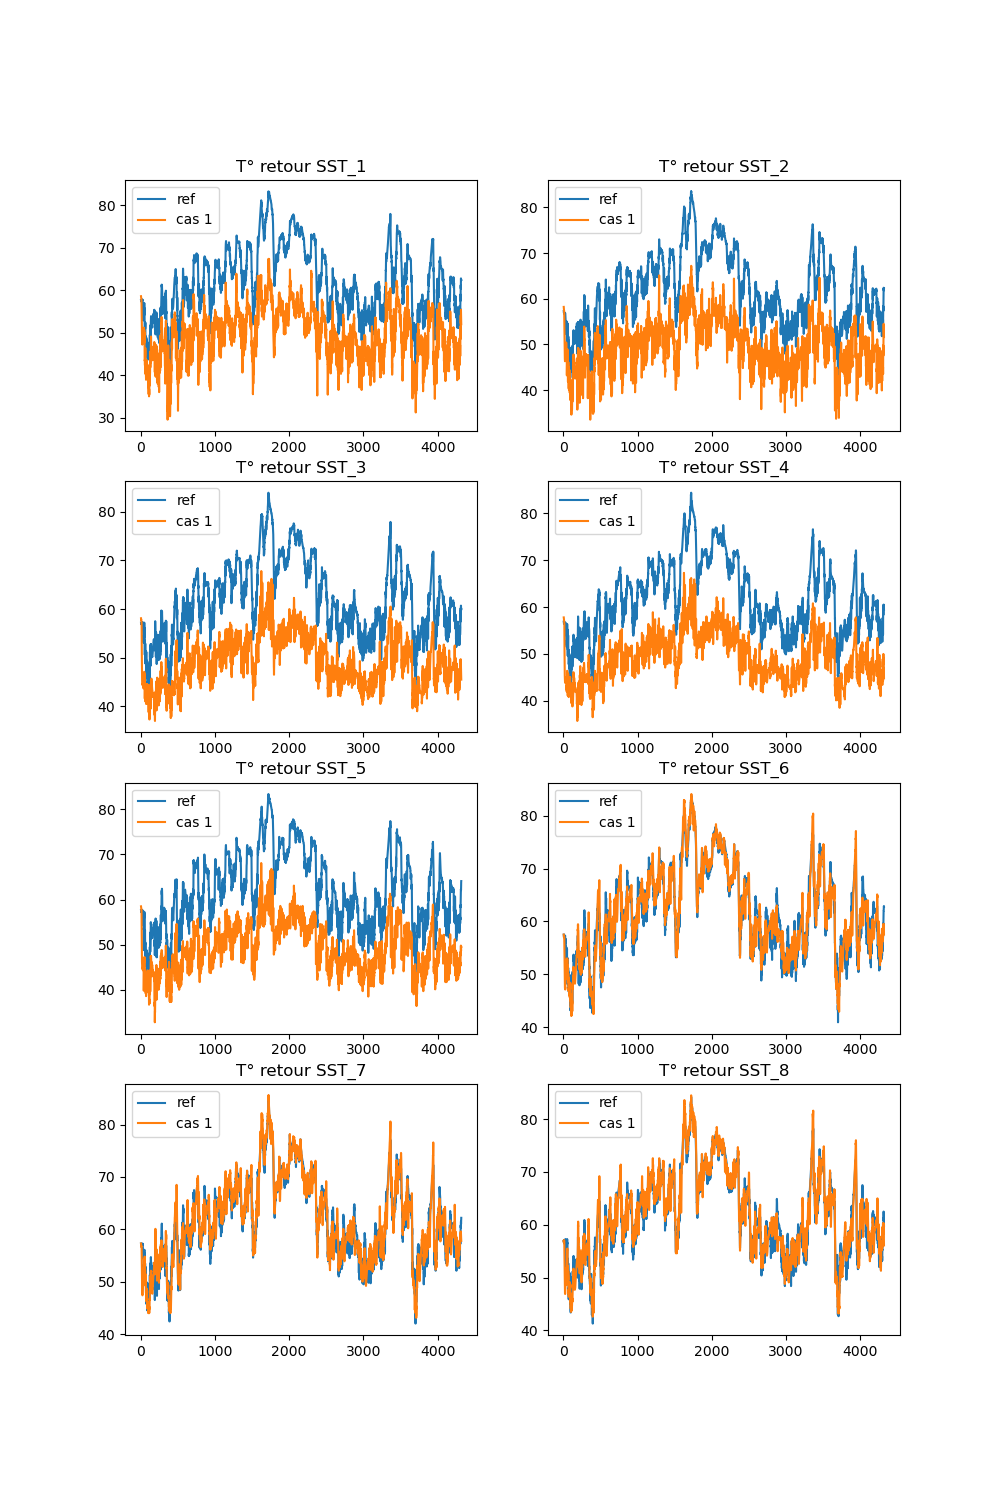

In [17]:
plt.close()
ax_t = np.arange(6,temps_simu,1)

fig1, ax0 = plt.subplots(figsize=(10,6))
ax0.plot(ax_t,T_cons_prod1[6:], label = "Tconsigne départ (°C)")
ax0.plot(ax_t,T_res_ret[6:], label = "T retour (ref) (°C)")
ax0.plot(ax_t,T_res_ret4[6:], label = "T retour (cas 4) (°C)")
ax0.set_title('Température chaufferie')
ax0.legend()
plt.show()

fig2, ax0 = plt.subplots(figsize=(10,6))
debitprimaire2 = np.sum(Sorties_SST1[2],axis=1)
ax0.plot(ax_t,debitprimaire[6:], label = "Référence")
ax0.plot(ax_t,debitprimaire4[6:], label = "Cas 4 (°C)")
ax0.set_title('Débit dans le circuit primaire (kg/s)')
ax0.legend()
plt.show()

fig2,axes = plt.subplots(nrows=2, ncols=1, figsize=(10,6))
ax0, ax1 = axes.flatten()
ax0.plot(ax_t,P_geo[7:], label = "Référence")
ax0.plot(ax_t,P_geo4[7:], label = "Cas 4")
ax0.set_title('Puissance fournie par la géothermie')
ax0.legend()

ax1.plot(ax_t,P_gaz[7:], label = "Référence")
ax1.plot(ax_t,P_gaz4[7:], label = "Cas 4")
ax1.set_title('Puissance fournie par le gaz')
ax1.legend()

fig3, axes = plt.subplots(nrows=4, ncols=2, figsize=(10,15))
for i, ax in enumerate(axes.flat):
    ax.plot(ax_t,Sorties_SST[4][6:,i], label = "ref")
    ax.plot(ax_t,Sorties_SST4[4][6:,i], label = "cas 4")
    ax.set_title('T° retour SST_%d' %(i+1))
    ax.legend()